In [2]:
%matplotlib inline
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
df = pd.read_csv('violations.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170521 entries, 0 to 170520
Data columns (total 9 columns):
ADDRESS           170521 non-null object
CAMERA ID         170521 non-null object
VIOLATION DATE    170521 non-null object
VIOLATIONS        170521 non-null int64
X COORDINATE      163959 non-null float64
Y COORDINATE      163959 non-null float64
LATITUDE          163959 non-null float64
LONGITUDE         163959 non-null float64
LOCATION          163959 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 11.7+ MB


In [4]:
df.describe()

,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,170521.000000,1.639590e+05,1.639590e+05,163959.000000,163959.000000
mean,28.880449,1.159712e+06,1.893473e+06,41.863389,-87.689229
std,36.636151,1.570560e+04,3.212393e+04,0.088338,0.057135
min,1.000000,1.121638e+06,1.820629e+06,41.663174,-87.828317
25%,7.000000,1.149783e+06,1.868078e+06,41.793493,-87.725084
50%,16.000000,1.159169e+06,1.898488e+06,41.877243,-87.689803
75%,37.000000,1.167170e+06,1.920991e+06,41.939040,-87.662810
max,479.000000,1.203645e+06,1.943342e+06,42.000260,-87.529848


In [5]:
df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,7/8/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,7/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,7/8/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,7/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,7/27/2014,92,NaN,NaN,NaN,NaN,NaN


In [19]:
df.dtypes

ADDRESS            object
CAMERA ID          object
VIOLATION DATE     object
VIOLATIONS          int64
X COORDINATE      float64
Y COORDINATE      float64
LATITUDE          float64
LONGITUDE         float64
LOCATION           object
dtype: object

In [21]:
df['Violation Date'] =  pd.to_datetime(df['VIOLATION DATE'], infer_datetime_format=True)

In [22]:
df['day_of_week'] = df['Violation Date'].dt.day_name()

In [24]:
df.head(5)

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Violation Date,day_of_week
0,7738 S WESTERN,CHI065,7/8/2014,65,NaN,NaN,NaN,NaN,NaN,2014-07-08,Tuesday
1,1111 N HUMBOLDT,CHI010,7/16/2014,56,NaN,NaN,NaN,NaN,NaN,2014-07-16,Wednesday
2,5520 S WESTERN,CHI069,7/8/2014,10,NaN,NaN,NaN,NaN,NaN,2014-07-08,Tuesday
3,1111 N HUMBOLDT,CHI010,7/26/2014,101,NaN,NaN,NaN,NaN,NaN,2014-07-26,Saturday
4,1111 N HUMBOLDT,CHI010,7/27/2014,92,NaN,NaN,NaN,NaN,NaN,2014-07-27,Sunday


In [30]:
df.groupby('day_of_week').sum()

,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
day_of_week,,,,,
Friday,753468,2.969780e+10,4.849572e+10,1.072352e+06,-2.246282e+06
Monday,686724,2.976620e+10,4.860353e+10,1.074738e+06,-2.251272e+06
Saturday,676715,1.893861e+10,3.090150e+10,6.827700e+05,-1.429940e+06
Sunday,663801,1.892335e+10,3.087836e+10,6.822298e+05,-1.428801e+06
Thursday,730603,3.063207e+10,5.002385e+10,1.106136e+06,-2.317053e+06
Tuesday,708276,3.147777e+10,5.140274e+10,1.136724e+06,-2.381161e+06
Wednesday,705136,3.070936e+10,5.014615e+10,1.108929e+06,-2.322930e+06


In [5]:
df.columns

Index(['ADDRESS', 'CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS', 'X COORDINATE',
       'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

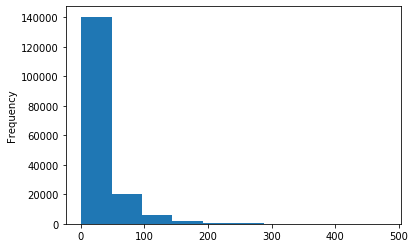

In [9]:
df['VIOLATIONS'].plot('hist',x='day_of_week')